# 8.2 2D Homographies

A 2D homography is a very general linear transformation between planes. In the previous notebook we applied rotations and translations to 3D points, which are examples of 3D euclidean homographies.

In computer vision, a homography is usually defined as a **perspective transformation of a plane**, in other workds, a reprojection of a plane from one camera image into a different one, where the camera may have been translated and/or rotated. As a consequence, **any two images of the same planar surface in space are related by a homography**. This has many practical applications, such as image rectification, image registration, etc. For 2D homographies, we have a $3x3$ matrix containing the linear transformation:$\\[010pt]$

$$
\begin{bmatrix} a & b & c \\ d & e & f \\ g & h & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\  1\end{bmatrix} 
=  
\begin{bmatrix} u \\ v \\  w\end{bmatrix}\hspace{2cm} \begin{array}{rcr} x' = u\ /\ w \\ y' = v \ / \ w \end{array}\\[5pt] $$ 

<img src="./images/intro_homography.png" width="400"/>$\\[5pt]$

Notice that in such transformation:
- Lines are kept straight.
- Incident lines remain.

**In this notebook we will learn:**

- different types of homographies (section 8.2.1).
- how to find the parameters for a given homography in 2D (section 8.2.2).
- under which conditions a homography exists (section 8.2.3).

## Problem context - Homography in american football

American football is a team sport played by two teams of eleven players on a rectangular field with goalposts at each end. For the cool things we are going to implement we just need to know some points about this sport:  

- The offense (the team with possession of the football) has 4 tries (called downs) for making the ball advance at least 10 yards (approx 9 meters). 
- If a player pass the **down line** (yellow) with the ball, the offense have another 4 tries to advance 10 yards (from the point where the football was lost). 
- **On television, a yellow line is electronically superimposed on the field to show the first down line to the viewing audience. Also, a blue line is superimposed showing where the play (the football) starts.**$\\[10pt]$

<img src="./images/example_football.jpg" width="500"/>$\\[3pt]$

As you can see in the image above, the offense is in the **3rd try** for advancing 10 yards (they advanced 5 yards in previous tries, so **the objective is 5 yards**). That information is given by a rectangle placed in the field showing **3rd (try) & 5 (yards to go)**.

Our objective in this notebook is to **place the blue line** (where the ball starts), the **yellow line** (down line) and the placed **rectangle** (which gives to the audience some information) **using homographies**. Cool, isn't?

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from math import cos,sin,pi

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
images_path = './images/'

## 8.2.1 2D homography hierarchy levels

But let's start from the beginning. All 2D homographies are linear transformation of 2D points, but there is a hierarchy level where we can distinguish different types of homographies (and, hence, transformations):$\\[10pt]$

<center><img src="./images/types.png" width="450" /></center>$\\[5pt]$

**<span style="color:orange">LEVEL 1: Translation</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}x + t_x \\ y + t_y \\ 1 \end{bmatrix}\\[5pt]$$

Translation is the most simple homography, since pixels of the plane are **only shifted** in both $X$ and $Y$ directions.

### **<span style="color:green"><b><i>ASSIGNMENT 1: Playing with... wait for it... translation!</i></b></span>**

Your first task is to define a transformation matrix `M` (*float64 numPy matrix*) that applies an arbitrary translation to the image `football.jpg`. You can apply a homography to an image using [`cv2.warpPerspective()`](https://docs.opencv.org/4.2.0/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87), which takes an image, the transformation matrix and the size of the output image as input. Finally, show both the original and resulting image.

*Note: The output image size deppends on the transformation we want to do, but for the following examples you can use the double of the width and height of the original image.*

In [4]:
# Assignment 1
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Read image


# Define transformation matrix


# Apply homography


# Show the resulting image


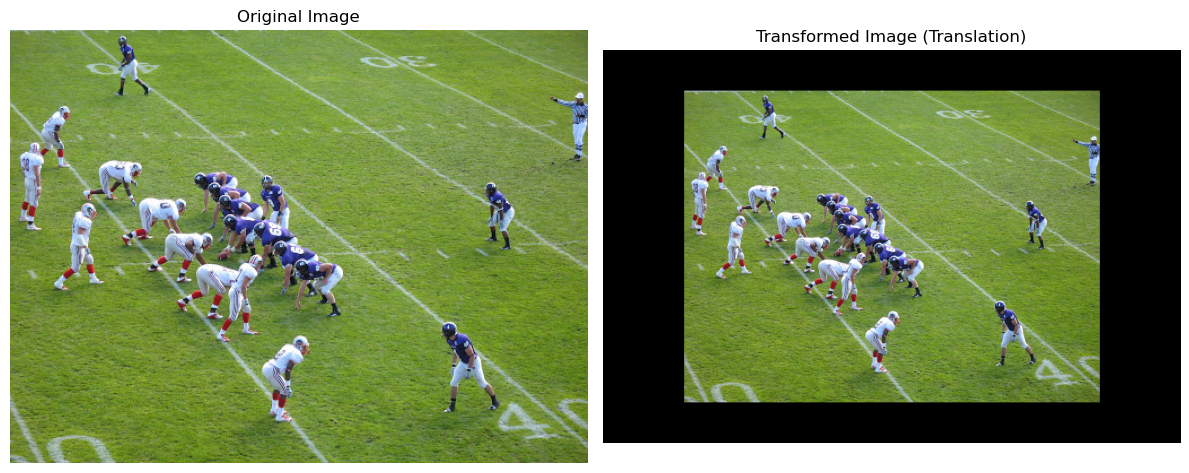

In [7]:
# Assignment 1 SOLUTION
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Read image following project conventions
img = cv2.imread(images_path + 'football.jpg')   
assert img is not None, "Image not found"
# Convert BGR to RGB following project pattern
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define transformation matrix with proper dtype for OpenCV
H = np.array([[1, 0, 100],
              [0, 1, 50],
              [0, 0, 1]], dtype=np.float64)

# Apply homography with larger output size to show translation effect
output_size = (img.shape[1] + 200, img.shape[0] + 100)
img_transformed = cv2.warpPerspective(img, H, output_size)

# Show the resulting image following project subplot patterns
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image (Translation)')
plt.imshow(img_transformed)
plt.axis('off')

plt.tight_layout()  # Following project visualization conventions
plt.show()

**<span style="color:orange">LEVEL 2: Euclidean transformation</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}cos(\theta)x - sin(\theta)y + t_x \\ sin(\theta)x + cos(\theta)y  + t_y \\ 1 \end{bmatrix}\\[5pt]$$

As we saw in the previous notebook, this homography applies **rotation + translation**.  
*Note that rotation is around the origin of coordinates (0,0), which is the top-left corner of the image.*  

### **<span style="color:green"><b><i>ASSIGNMENT 2: Euclidean transformation comes into play</i></b></span>**

Repeat the previous exercise using an Euclidean transformation.

In [ ]:
# Assignment 2
# Define transformation matrix


# Apply homography


# Show the resulting image


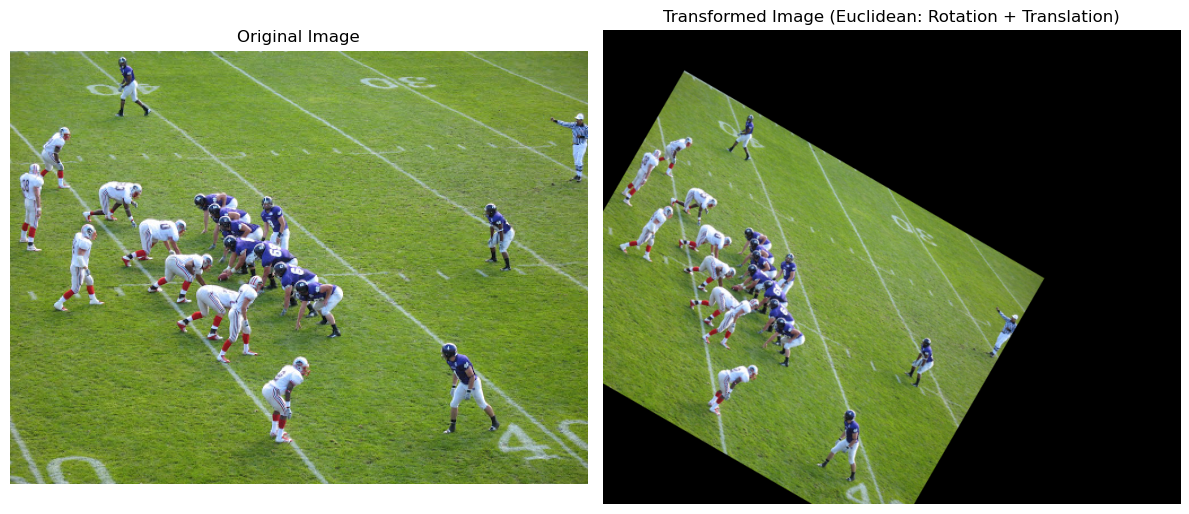

In [9]:
# Assignment 2 SOLUTION
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Define transformation matrix for Euclidean transformation (rotation + translation)
# Using 30 degree rotation and translation of (100, 50)
theta = np.radians(30)  # Convert degrees to radians following project pattern
H = np.array([[cos(theta), -sin(theta), 100],
              [sin(theta),  cos(theta), 50],
              [0,           0,          1]], dtype=np.float64)

# Apply homography with larger output size to show transformation effect
output_size = (img.shape[1] + 200, img.shape[0] + 200)
img_transformed = cv2.warpPerspective(img, H, output_size)

# Show the resulting image following project subplot patterns
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image (Euclidean: Rotation + Translation)')
plt.imshow(img_transformed)
plt.axis('off')

plt.tight_layout()  # Following project visualization conventions
plt.show()

**<span style="color:orange">LEVEL 3: Similarity</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} s & 0 & 0 \\ 0 & s & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} s\cdot cos(\theta) & -s\cdot sin(\theta) & s\cdot t_x \\ s\cdot sin(\theta) & s\cdot cos(\theta) & s\cdot t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}s\cdot (cos(\theta)x - sin(\theta)y + t_x) \\ s\cdot (sin(\theta)x + cos(\theta)y  + t_y) \\ 1 \end{bmatrix}\\[5pt]$$

This homography applies **rotation + translation + scale**.  
*Note that scale have to be equal for both axes $x$ and $y$.*  

### **<span style="color:green"><b><i>ASSIGNMENT 3: Applying a similarity transformation</i></b></span>**

Repeat the previous exercise using a similarity transformation.

In [ ]:
# Exercise 6.2.3


# Define transformation matrix


# Apply homography


# Show the resulting image


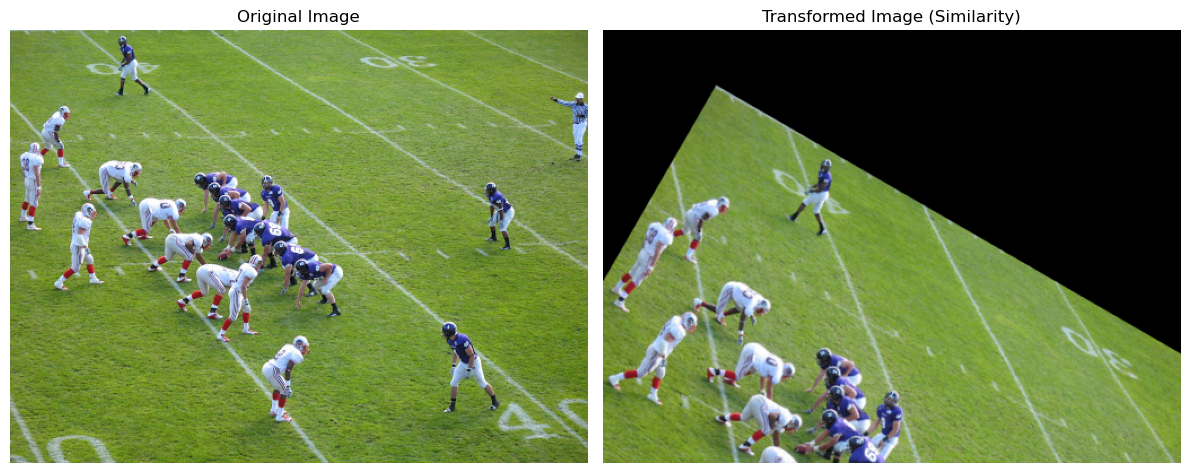

In [10]:
# Exercise 6.2.3 SOLUTION
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Define similarity transformation matrix
scale = 1.2
H = np.array([[scale * cos(theta), -scale * sin(theta), 100],
              [scale * sin(theta),  scale * cos(theta), 50],
              [0,                  0,                  1]], dtype=np.float64)

# Apply homography
img_transformed = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))


# Show the resulting image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image (Similarity)')
plt.imshow(img_transformed)
plt.axis('off')

plt.tight_layout()  # Following project visualization conventions
plt.show()


**<span style="color:orange">LEVEL 4: Affine</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h_{11} & h_{12}\\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}h_{00}x + h_{01}y + h_{02}\\ h_{10}x + h_{11}y + h_{12}\\ 1 \end{bmatrix}\\[5pt]$$

This is an interesting homography because it appears quite often in real life (e.g. when the depth variation within the planar object and a camera is large):$\\[10pt]$

<img src="./images/affine.png" width="300" />$\\[5pt]$

We can deffine it as a **rotation + translation + scale (different for each axis)** transform.

### **<span style="color:green"><b><i>ASSIGNMENT 4: Affine transformation, I choose you</i></b></span>**

Repeat the previous assignment but using an affine transformation.

In [ ]:
# Assignment 4

# Define transformation matrix


# Apply homography


# Show the resulting image



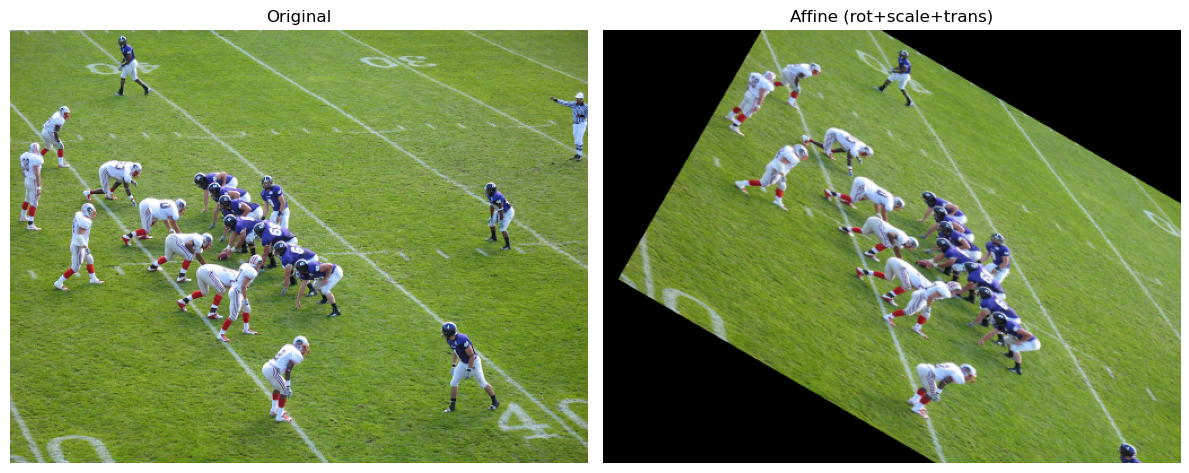

In [17]:
# Assignment 4 — Affine transform: rotation + (sx, sy) scaling + translation

import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- params (edit these) ---
theta_deg = 30.0          # rotation in degrees (CCW)
sx, sy     = 1.2, 0.8     # scaling along x and y
tx, ty     = 100, 50      # translation in pixels
# ---------------------------

# Read image following project conventions
img = cv2.imread(images_path + 'football.jpg') # image should be loaded as BGR   
assert img is not None, "Image not found"

h, w = img.shape[:2]
cx, cy = w / 2.0, h / 2.0  # rotate about image center

# Build affine matrix:
# linear part A = R(theta) @ diag([sx, sy])
th = np.deg2rad(theta_deg)
c, s = np.cos(th), np.sin(th)
A = np.array([[ sx * c, -sy * s],
              [ sx * s,  sy * c]], dtype=np.float32)

# Make rotation happen about the image center, then apply translation (tx, ty)
# x' = A (x - c) + c + t  =>  t_eff = t + c - A c
center = np.array([cx, cy], dtype=np.float32)
t_eff  = np.array([tx, ty], dtype=np.float32) + center - A @ center

# Final 2×3 affine matrix
M = np.hstack([A, t_eff.reshape(2, 1)])  # shape (2,3)

# Apply affine transform
img_aff = cv2.warpAffine(
    img, M, (w, h),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0)
)

# Show
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.title('Original'); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
plt.subplot(1, 2, 2); plt.title('Affine (rot+scale+trans)'); plt.imshow(cv2.cvtColor(img_aff, cv2.COLOR_BGR2RGB)); plt.axis('off')
plt.tight_layout(); plt.show()


**<span style="color:orange">LEVEL 5: Projective</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h_{11} & h_{12}\\ h_{20} & h_{21} & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}h_{00}x + h_{01}y + h_{02}\\ h_{10}x + h_{11}y + h_{12}\\ h_{20}x + h_{21}y + 1 \end{bmatrix}\\[5pt]$$

And we have reached the top level: The projective transformation is the general 2D homography since there are no constraints. Unlike the affine transformation, projective tranfomations appear in real life when variation in depth is comparable to distance from the camera to an object:$\\[10pt]$

<img src="./images/comparison_projective.png" width="650" />$\\[5pt]$

*Note that we used $h_{22}=1$ for fixing the scale factor in linear transformations. This constraint can be replaced with $\textbf{||h|| = 1}$ (better).*  

Projective transformation is a very poweful tool, and it has many applications, **see the following example.**

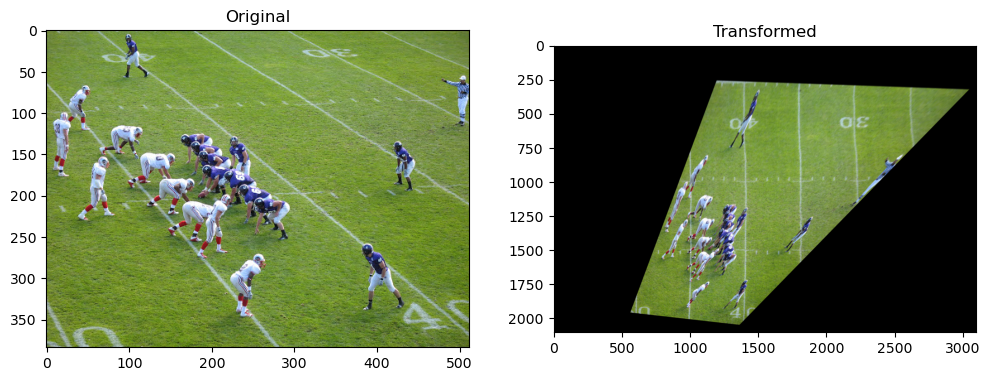

In [20]:

# Read image following project conventions
image = cv2.imread(images_path + 'football.jpg')   
assert img is not None, "Image not found"
# Convert BGR to RGB following project pattern
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define projective transformation matrix
M = np.array([[3.1654,0.03225,1191.14702],
              [0.0799604,10.2911,263.9896],
              [-0.00014621,0.00300344,1]], 
              dtype=np.float64)

# Apply homography
transformed = cv2.warpPerspective(image, M, (3100,2100))

# Show the resulting image
plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformed")
plt.imshow(transformed)

As you can see, the perspective of the image has been **removed** and the resultant image is *like* an image taken from the air.

But, you can see that the coefficient of the employed matrix are not some randomly picked numbers, so how can you obtain the specific matrix `M` that is able to do this? The short answer is from a set of corresponding points (rings any bell?). And going one step further: **How can a matrix `M` be obtained having pairs of correspondences**?  

Just as a preview, in the example above, we have used the four corners of the rectangle that the white lines are forming and we have made them corresponded with an actual rectangle without perspective. Do not worry, we will explain this later, but first let's have a look at the maths behind this.

## 8.2.2 Solving the 2D homography: Direct Lineal Transformation (DLT)

As you know, a general 2D homography that converts a point $p=(x,y)$ to another point $p'=(x',y')$ looks like this (in homogeneous coordinates):$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h_{11} & h_{12}\\ h_{20} & h_{21} & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix}$$

If we know the coordinates of the corresponding points in both images, we can build an equation system to solve the coefficients of the matrix. Furthermore, knowing a certain amount of corresponding points that share the same homography will allow us to get a(n) (over)determined equation system to get them.  

In this case, from a certain pair of points $i$, we can form a linear equations system in order to isolate the matrix variables:$\\[5pt]$

$$
\begin{aligned}
x'_i &= \frac{h_{00}x_i + h_{01}y_i + h_{02}}{h_{20}x_i + h_{21}y_i + 1}
\;\longrightarrow\;
x'_i\,(h_{20}x_i + h_{21}y_i + 1) = h_{00}x_i + h_{01}y_i + h_{02} \\[8pt]
y'_i &= \frac{h_{10}x_i + h_{11}y_i + h_{12}}{h_{20}x_i + h_{21}y_i + 1}
\;\longrightarrow\;
y'_i\,(h_{20}x_i + h_{21}y_i + 1) = h_{10}x_i + h_{11}y_i + h_{12}
\end{aligned}
$$

$$A\mathbf{h} = 0 \longrightarrow
\begin{bmatrix}
-x_i & -y_i & -1 & 0 & 0 & 0 & x'_ix_i & x'_iy_i & x'_i \\
0 & 0 & 0 & -x_i & -y_i & -1 & y'_ix_i & y'_iy_i & y'_i
\end{bmatrix} 
\begin{bmatrix}
h_{00} \\ h_{01} \\ h_{02} \\ h_{10} \\ h_{11} \\ h_{12} \\ h_{20} \\ h_{21} \\ 1
\end{bmatrix} 
=
\begin{bmatrix}
0 \\ 0 
\end{bmatrix} 
\\[5pt]
$$

You can see that with less than 4 independent points ($rank(A) \lt 8$), there are infinitely many solutions behind $k\textbf{h}$.

But, if we have **4 or more independent pair of points**:$\\[5pt]$

$$Ah = 0 \longrightarrow
\begin{bmatrix}
-x_1 & -y_1 & -1 & 0 & 0 & 0 & x'_1x_1 & x'_1y_1 & x'_1 \\
0 & 0 & 0 & -x_1 & -y_1 & -1 & y'_1x_1 & y'_1y_1 & y'_1 \\
& & & &\vdots \\
-x_n & -y_n & -1 & 0 & 0 & 0 & x'_nx_n & x'_ny_n & x'_n \\
0 & 0 & 0 & -x_n & -y_n & -1 & y'_nx_n & y'_ny_n & y'_n \\
\end{bmatrix} 
\begin{bmatrix}
h_{00} \\ h_{01} \\ h_{02} \\ h_{10} \\ h_{11} \\ h_{12} \\ h_{20} \\ h_{21} \\ 1
\end{bmatrix} 
= 
\begin{bmatrix}
0 \\0\\ \vdots \\ 0 \\ 0
\end{bmatrix} 
$$


- For $\textbf{n = 4}$ **independent pair of points** ($rank(A) = 8$), there is a solution $k\textbf{h}$ with $\textbf{h} \ne 0, k \ne 0$. This should be sufficient (and strictly it is, as we will test later), but the solution will be highly affected by the noise in the points coordinates, so this is not usually employed in applications with automatically detected points, but for manually chosen ones.$\\[5pt]$
- For $\textbf{n > 4}$ **independent pair of points** ($rank(A) \gt 8$), (e.g. those pair of points detected by SIFT) there is not a solution (apart from $\textbf{h} = 0$) as the system is overdetermined. However, we can get the solution that minimizes the error in the points coordinates (that is, the least-squares solution): $\\[5pt]$

    - Arg. min$_h ||\textbf{Ah}||^2$ with $||\textbf{h}|| = 1$$\\[5pt]$
    - Solution $\hat{h}$: eigenvector of the smallest eigenvalue of $A^TA$
    
Note that if you know the specific type of the transformation, you may need less points to solve this equation system:

- **Translation** (2 unknowns) $\rightarrow$ **1 pair of points needed**
- **Euclidean** (3 unknowns) $\rightarrow$ **2 pair of points needed**
- **Similarity** (4 unknowns) $\rightarrow$ **2 pair of points needed**
- **Affine** (6 unknowns) $\rightarrow$ **3 pair of points needed**
- **Projective** (8 unknowns) $\rightarrow$ **4 pair of points needed**

But, as we said, usually, you need many more points for noise robustness, so this is not relevant at all.  

Also, each type of transformation entails certain transformations and invariance, the table below resume this:$\\[10pt]$

<table>
<tbody>
<tr style="height: 23px;border: 1px solid black;">
<th style="height: 23px;border: 1px solid black;">&nbsp;</td>
<th style="height: 23px;border: 1px solid black;">Euclidean </td>
<th style="height: 23px;border: 1px solid black;">&nbsp;Similarity</td>
<th style="height: 23px;border: 1px solid black;">&nbsp;Affine</td>
<th style="height: 23px;border: 1px solid black;">&nbsp;Projective</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<th style="height: 23px;border: 1px solid black;">&nbsp;Transformations:</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Rotation, translation</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Isotropic scale</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Axes scale</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Perspective transformation</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<th style="height: 23px;border: 1px solid black;">&nbsp;Invariants:</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Distance</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Angles, distance ratios</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">Parallelism, mass center</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Cross-ratio</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
</tbody>
</table>

### **<span style="color:green"><b><i>ASSIGNMENT 5a: Let's apply your knowledge</i></b></span>**

Now that we know how to solve the homography 2D, let's go back to our American football problem.

We are going to work with the image `football-big.jpg`, which is the same as the one used in previous exercises but with a better resolution and quality.

Let's start by reading and showing such color image:

In [ ]:
# Assignment 5a

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

# Read american football image.


# Show it


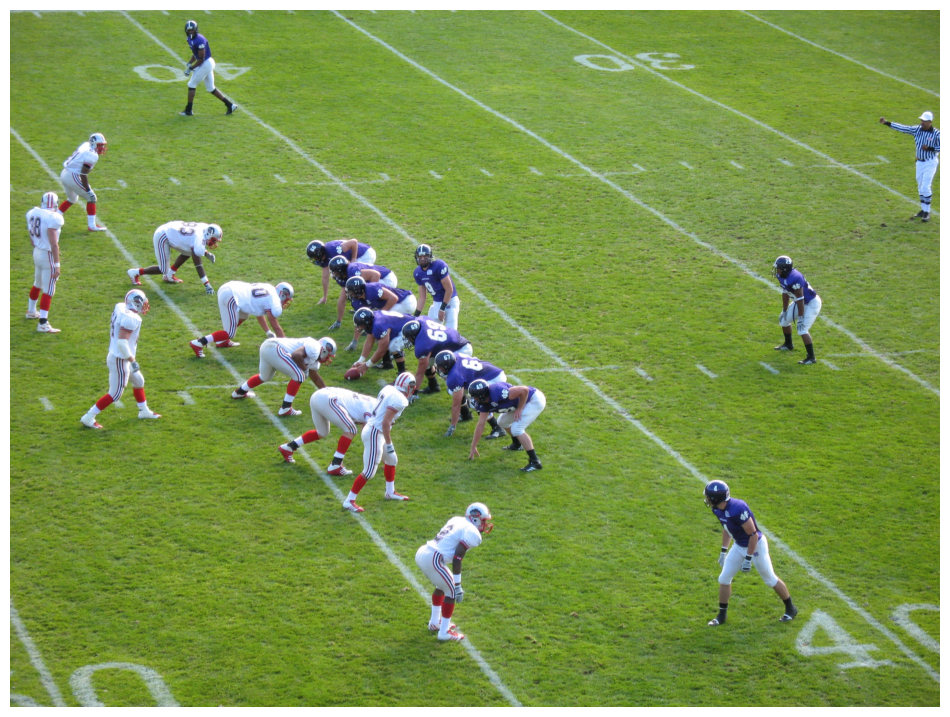

In [5]:
# Assignment 5a SOLUTION

import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

# Read american football image.
img = cv2.imread("./images/football-big.jpg")
assert img is not None, "Failed to load image"
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show it
plt.imshow(img)
plt.axis("off")
plt.show()


Our first task is to add the image `marker.jpg` to the field. 

<img src="./images/marker.jpg" width="150" />$\\[5pt]$

For adding an image without perspective to an image with perspective, the first step is to **remove the perspective** of the original image, and for that we are going to *map* the points of a rectangle on the field to **an actual rectangle**, but keeping the ratio of the sides' lengths of the rectangle (remember that a projective transformation is only invariant to the cross-ratio distances!):

<img src="./images/points-homography.png" width="800" />$\\[5pt]$

Now that we have four (manually selected) corresponding points, we are going to compute the transformation matrix of that projective homography. This is easy in openCV, as it provides the [`cv2.findHomography()`](https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780) method, which method takes two lists of corresponding points as input: the first list contains the input coordinates $(x_i,y_i)$ and the second list their correspondences $(x'_i,y'_i)$.

*Note that those points represent coordinates, their format is $(n\_col, n\_row)$*.

### **<span style="color:green"><b><i>ASSIGNMENT 5b: Obtaining the transformation matrix</i></b></span>**

Take the **four corners of the specified rectangle** (you can use an external tool to get the coordinates) and obtain the transformation matrix that removes the perpective of the football field. Then **use `warpPerspective()` with the obtained matrix** to remove the perspective and **show the image**. Finally, save it into your computer, we will need it for the next exercise.

*Remember that the output rectangle should maintain the ratio of the original football field ($10\ /\ 6.16$) when you define the list of the correspondent points, and for computation purposes use numbers that are "similar".*

In [ ]:
# Assignment 5b

# Points of a rectangle in the field


# Points of a rectangle without perspective with r=1.6


# Calculate Homography


# Warp source image to destination based on homography


# Show image without perspective


# Save image


Now that we have the field without perspective, we can add the marker to the image in any place.

As we want to **add the start and down line in the original image**, we need to **take two points for each line in this image** (note that now the lines are vertical lines, so take points with the same $x$ coordinate for both lines). In the next exercise we will apply inverse homography to those points so it will be possible to draw the line in the original image. **The down line should be at 3 yards of the start line** (each small vertical segment marks one yard, and vertical lines mark five yards).

### **<span style="color:green"><b><i>ASSIGNMENT 5c: Adding the marker</i></b></span>**

Add the marker to the image without perspective and show it, also take the points mentioned before. The resulting image should look like this:$\\[5pt]$

<img src="./images/marker-example.png" width="600" />$\\[5pt]$

In [ ]:
# Assigment 5c
# Read the marker image.


# Get width and height


# Choose position of marker


# Place marker in football field image without perspective


# Show image


# Pick two homogenous points contained in the start line


# Pick two homogenous points contained in the down line


It's time to restore the initial perspective, for that **apply homography using the inverse of the transformation matrix**:

$$\lambda \begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h_{11} & h_{12}\\ h_{20} & h_{21} & 1 \end{bmatrix}^{-1}\begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix}$$

### **<span style="color:green"><b><i>ASSIGNMENT 5d: Going back to the initial perspective, but with the mark!</i></b></span>**

Compute the inverse of the transformation matrix using [`numpy.linalg.inv()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html), and bring back the perspective to the image with the marker using the new homography and show it.

*Now, you should see the marker having the same perspective than the original image.*

In [ ]:
# Assignment 5d

# Compute the inverse of the homography


# Get the original perspective again


# Show the image


Finally, its time to **draw the lines**. You should have saved the coordinates of two points for each line in the image without perspective.

For homography of lines, you just need to **apply the homography to two points of the line**. In that way, you will have two points in the original image defining the line.

Note that `cv2.line()` has two points as input, but only draws the segment line. You will have to **extend that segment** using the slope of the line.

$$slope = \frac{y_2-y_1}{x_2-x_1}$$

The new points will be:

$$
\begin{aligned}
x'_1 &= x_1 + \text{extension}, \quad & y'_1 &= y_1 + \text{extension}\cdot \text{slope} \\[4pt]
x'_2 &= x_2 - \text{extension}, \quad & y'_2 &= y_2 - \text{extension}\cdot \text{slope}
\end{aligned}
$$


### **<span style="color:green"><b><i>ASSIGNMENT 5e: Drawing lines</i></b></span>**

Apply the **inverse homography** to the line points, **extend** the line segment and **draw** the start line (blue) and the down line (yellow). Finally, show the resulting image.

This resulting image should look like this:$\\[5pt]$

<img src="./images/result.png" width="400" />$\\[5pt]$

In [ ]:
# Assignment 5e
# Apply inverse homography to the start line points taken in the image without perspective


# Compute the slope for extending the line segment


# Extend the line segment


# Draw the start line


# Apply inverse homography to the down line points taken in the image without perspective


# Compute the slope for extending the line segment


# Extend the line segment


# Draw the start line


# And... show the final image!


## 8.2.3 When can a homography be applied?

We have applied a homography to this football field because it is a transformation **between planes**, but if you look to the top player in the *aerial* image, you can see that the transformation is not good at all. So, we need to know when can we apply a homography. 

It can be said that there is a homography $H_{3\times3}$ between points in these 3 cases:

<img src="./images/applications.png" width="800" />

In this exercise we have had a **still camera** and we have transformed a image plane to another. Since the players are not in the same plane that the football field, the homography is not valid for those points.

On the other hand, there is also an homography **for a rotating camera observing a non-planar scene**. Actually, this would the next step for **image stitching** after computing matches with keypoints in the example application in Chapter 4. We already have the correspondences either using Harris or SIFT, so the homography should be easy to obtain.$\\[5pt]$

<img src="./images/stitching.png" width="800" />$\\[5pt]$

Finally, there are a homography for a **moving camera observing a plane**. This is the typical case of 2 images of a painting taken from different positions:$\\[5pt]$

<img src="./images/painting.png" width="400" />

## Conclusion

Fantastic work! Homographies are a very important tool in computer vision. In this notebook you have learned:

- what a homography is, how to solve it and how to apply it,
- when a homography can be used,
- how to apply homographies to lines,
- some homography applications that are currently being used in American football (and other sports too! think about placing advertising on a tennis or football courts).

## BONUS Assignment 6 (SOLVED)

Let’s unwarp (rectify) a laptop screen to a clean fronto-parallel rectangle.

How to use the following laptop rectification example:

- Run the cell containing the Python code.
- In the window, click the four inner corners of the laptop’s screen (any order).
- Press c to confirm (or r to restart).
- The rectified screen is displayed along with the original image and is also saved as laptop_screen_rectified.png.

In [29]:
# Rectify the laptop screen from a photo (click 4 corners)
# Works in Jupyter/Colab/VSCode via matplotlib's ginput.

import cv2
import numpy as np

%matplotlib qt 

import matplotlib.pyplot as plt

IMG_PATH = "./images/laptop.jpg"   # <-- put your image path here
SAVE_AS  = "./images/laptop_screen_rectified.png"

def order_pts(pts):
    """Order 4 points as tl, tr, br, bl."""
    pts = np.array(pts, dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1).ravel()
    tl = pts[np.argmin(s)]
    br = pts[np.argmax(s)]
    tr = pts[np.argmin(diff)]
    bl = pts[np.argmax(diff)]
    return np.array([tl, tr, br, bl], dtype="float32")

def four_point_warp(img, pts, out_size=None):
    rect = order_pts(pts)
    (tl, tr, br, bl) = rect

    # compute output size (keep aspect from the quad)
    widthA  = np.linalg.norm(br - bl)
    widthB  = np.linalg.norm(tr - tl)
    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxW = int(round(max(widthA, widthB)))
    maxH = int(round(max(heightA, heightB)))

    if out_size is not None:
        maxW, maxH = out_size

    dst = np.array([[0, 0],
                    [maxW - 1, 0],
                    [maxW - 1, maxH - 1],
                    [0, maxH - 1]], dtype="float32")

    H = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(img, H, (maxW, maxH),
                                 flags=cv2.INTER_LINEAR,
                                 borderMode=cv2.BORDER_CONSTANT,
                                 borderValue=(0,0,0))
    return warped, rect, H

# --- load image (RGB for plotting) ---
bgr = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)
assert bgr is not None, f"Can't read {IMG_PATH}"
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# --- click 4 corners (any order; we'll sort them) ---
plt.figure(figsize=(8,6)); plt.imshow(img); plt.title("Click the 4 laptop-screen corners, then press Enter")
clicked = plt.ginput(4, timeout=-1)  # returns list of (x,y)
plt.close()
if len(clicked) != 4:
    raise RuntimeError("You must click exactly 4 corners.")

warped, rect, H = four_point_warp(img, clicked)  # or pass out_size=(1920,1080)

# --- visualize result ---
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img); ax[0].set_title("Original + picked corners"); ax[0].axis('off')
for (x,y) in rect: ax[0].plot([x],[y],'ro', ms=6)
ax[1].imshow(warped); ax[1].set_title("Rectified laptop screen"); ax[1].axis('off')
plt.tight_layout(); plt.show()

# save
cv2.imwrite(SAVE_AS, cv2.cvtColor(warped, cv2.COLOR_RGB2BGR))
print("Saved:", SAVE_AS)


Saved: ./images/laptop_screen_rectified.png


Expected output:

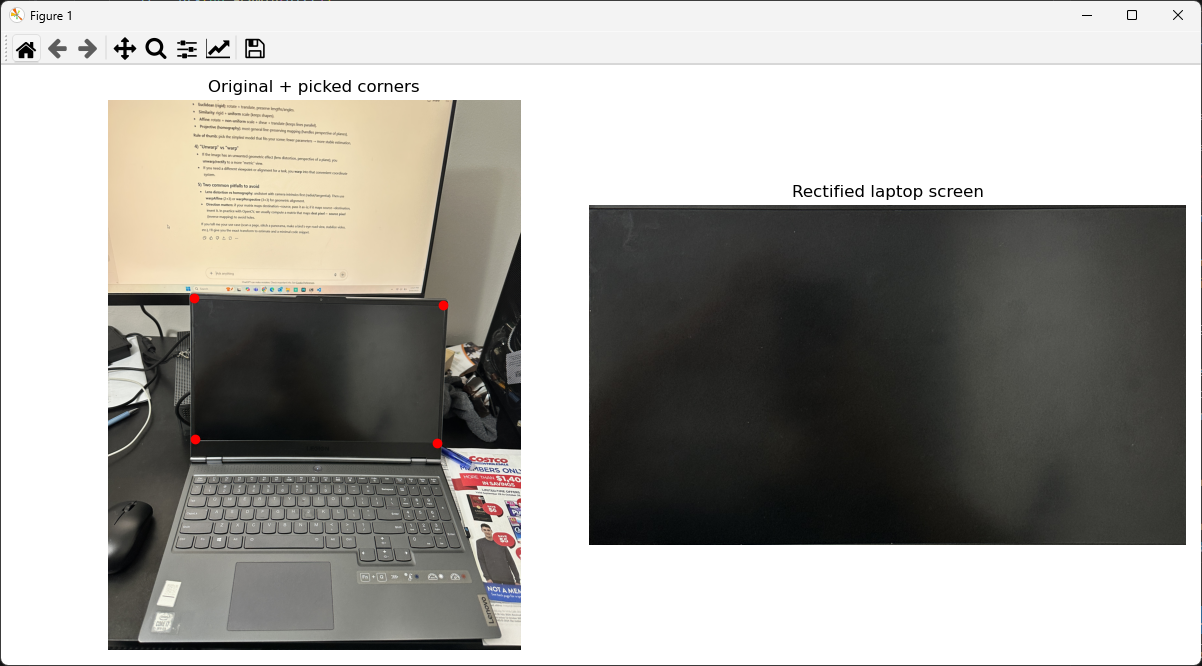

Let's overlay a tiger image onto the laptop screen.

In [ ]:
# Overlay tiger onto laptop screen using a homography
# Click the four inner corners of the laptop screen (any order), press 'c' to confirm.

import cv2
import numpy as np
import os

%matplotlib qt 

import matplotlib.pyplot as plt

BG_PATH = r"./images/laptop.jpg"            # <-- your original photo with the laptop
FG_PATH = r"./images/tiger.jpg"             # <-- the 640x480 tiger image
OUT_PATH = r"./images/laptop_with_tiger.png"

# ---------- helpers ----------
def order_pts(pts):
    """Return points ordered as top-left, top-right, bottom-right, bottom-left."""
    pts = np.asarray(pts, dtype=np.float32)
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1).ravel()
    tl = pts[np.argmin(s)]
    br = pts[np.argmax(s)]
    tr = pts[np.argmin(diff)]
    bl = pts[np.argmax(diff)]
    return np.array([tl, tr, br, bl], dtype=np.float32)

def pick_four_points(win_name, img_disp, scale):
    pts_disp, pts_full = [], []
    def on_mouse(event, x, y, flags, userdata):
        nonlocal pts_disp, pts_full, img_disp
        if event == cv2.EVENT_LBUTTONDOWN:
            pts_disp.append((x, y))
            pts_full.append((x/scale, y/scale))
            cv2.circle(img_disp, (x, y), 5, (0,255,0), -1)
            if len(pts_disp) >= 2:
                cv2.line(img_disp, pts_disp[-2], pts_disp[-1], (0,255,0), 2)

    cv2.namedWindow(win_name)
    cv2.setMouseCallback(win_name, on_mouse)
    while True:
        cv2.imshow(win_name, img_disp)
        k = cv2.waitKey(20) & 0xFF
        if k == ord('r'):
            pts_disp, pts_full = [], []
            img_disp[:] = img_preview.copy()
        elif k == ord('c') and len(pts_full) == 4:
            break
        elif k in (27, ord('q')):
            cv2.destroyAllWindows()
            raise SystemExit("Cancelled.")
    cv2.destroyAllWindows()
    return order_pts(pts_full)

# ---------- load images ----------
bg = cv2.imread(BG_PATH)           # BGR
if bg is None:
    raise FileNotFoundError(BG_PATH)
fg = cv2.imread(FG_PATH)           # BGR
if fg is None:
    raise FileNotFoundError(FG_PATH)

h_bg, w_bg = bg.shape[:2]
h_fg, w_fg = fg.shape[:2]          # should be 480×640 as you said, but we use the actual size

# ---------- pick screen corners on a scaled preview ----------
scale = 1000.0 / max(w_bg, h_bg) if max(w_bg, h_bg) > 1000 else 1.0
img_preview = cv2.resize(bg, (int(w_bg*scale), int(h_bg*scale)), interpolation=cv2.INTER_AREA)
screen_quad = pick_four_points("Click 4 laptop-screen corners; 'r' reset; 'c' confirm", img_preview.copy(), scale)

# ---------- build homography tiger->screen and warp ----------
src = np.float32([[0,0], [w_fg-1,0], [w_fg-1,h_fg-1], [0,h_fg-1]])   # tiger corners (tl,tr,br,bl)
dst = screen_quad                                                     # laptop screen corners (tl,tr,br,bl)

H = cv2.getPerspectiveTransform(src, dst)
warped_fg = cv2.warpPerspective(fg, H, (w_bg, h_bg), flags=cv2.INTER_LINEAR)

# mask: all tiger pixels are valid (255), warp the mask the same way
mask = np.full((h_fg, w_fg), 255, np.uint8)
warped_mask = cv2.warpPerspective(mask, H, (w_bg, h_bg), flags=cv2.INTER_NEAREST)

# ---------- composite onto background ----------
inv = cv2.bitwise_not(warped_mask)
bg_hole = cv2.bitwise_and(bg, bg, mask=inv)
fg_on_bg = cv2.bitwise_and(warped_fg, warped_fg, mask=warped_mask)
result = cv2.add(bg_hole, fg_on_bg)

# (Optional) seamless blending – uncomment if you prefer Poisson blending:
# center = tuple(np.mean(screen_quad, axis=0).astype(int))
# result = cv2.seamlessClone(warped_fg, bg, warped_mask, center, cv2.NORMAL_CLONE)

cv2.imwrite(OUT_PATH, result)
print("Saved:", os.path.abspath(OUT_PATH))

# quick preview
cv2.imshow("Result", result); cv2.waitKey(0); cv2.destroyAllWindows()


Saved: c:\Users\Tufail\Documents\1. Jupyter-Notebooks-for-Computer-Vision\Chapter 08. Image Formation\images\laptop_with_tiger.png


Expected result:

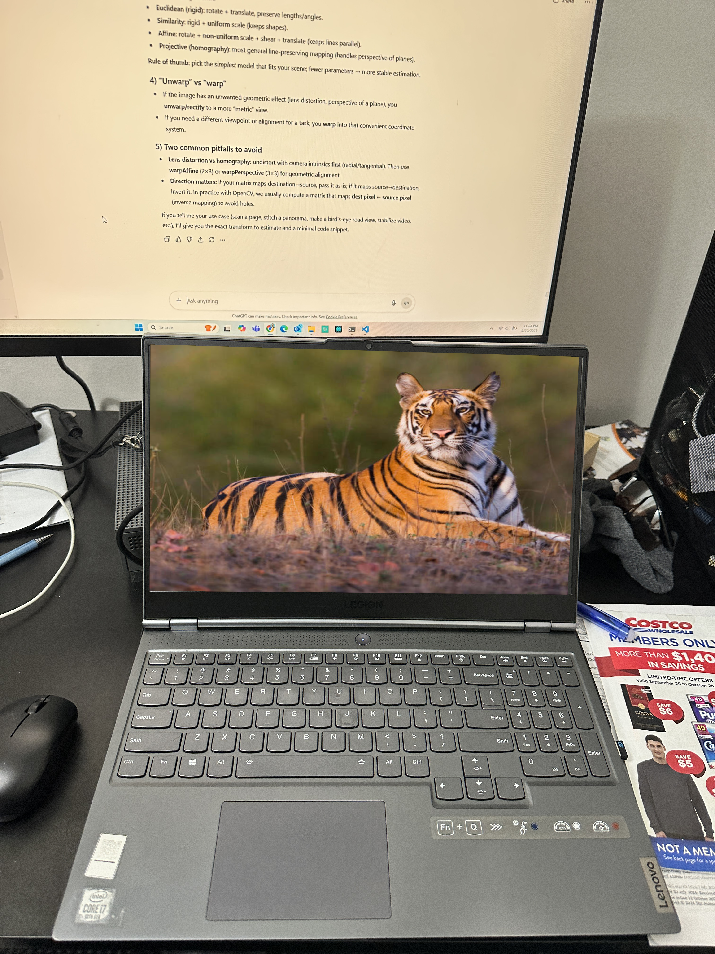